<div align="center">
  <h1>Homework 4</h1>
    <p>
        <div align="center">
        <h2>Yutong Dai yutongd3@illinois.edu</h2>
        </div>
    </p>
</div>

## 3.6
a) According to the graph below, the optimal value for the objective function is $-\frac{11}{3}$, which is attained at $(\frac{1}{3},\frac{4}{3})$.

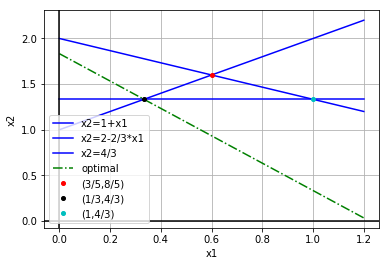

In [5]:
import matplotlib.pyplot as plt
import numpy as np
x = np.linspace(0,1.2,100)
fig, ax = plt.subplots()
ax.plot(x, 1 + x, 'b-', markersize=2, label="x2=1+x1")
ax.plot(x, 2-(2/3)*x, 'b-', markersize=2, label="x2=2-2/3*x1")
ax.plot(x, np.zeros_like(x)+4/3, 'b-', markersize=2, label="x2=4/3")
ax.plot(x, -(3/2)*x - (1/2) * (-11/3), "g-.", label="optimal")
plt.plot(3/5,8/5,'ro',markersize=4, label='(3/5,8/5)')
plt.plot(1/3,4/3,'ko',markersize=4, label='(1/3,4/3)')
plt.plot(1,4/3,'co',markersize=4, label='(1,4/3)')
ax.grid(True, which='both')
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
plt.legend()
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

b)

Rewrite the problem in the standard form,

$$
\begin{align}
& \max \quad -3x_1  - 2x_2\\
& s.t \quad -x_1 + x_2 + x_3 = 1\\
& \qquad 2x_1 + 3x_2 + x_4 = 6\\
& \qquad x_2 -x_5 = \frac{4}{3} \\
& \qquad x_1,...,x_5\geq 0
\end{align}
$$

Then we partition the matrix $A$ as

$$
A=
\begin{bmatrix}
-1 & 1 & 1 & || & 0 & 0 \\
2  & 3 & 0 & || & 1 & 0\\
0  & 1 & 0 & || & 0 & -1
\end{bmatrix},
$$

So $B=
\begin{bmatrix}
-1 & 1 & 1 \\
2  & 3 & 0 \\
0  & 1 & 0 \\
\end{bmatrix}$, 
$N=
\begin{bmatrix}
 0 & 0 \\
 1 & 0\\
 0 & -1
\end{bmatrix}$, $C_B^T=(-3,-2,0)$, $C_N^T=(0,0)$, $b^T=(1,6,4/3)$.

So the **basic feasible solution** is $x_0^T=[(B^{-1}b)^T,0^T]=(1, 4/3, 2/3, 0, 0)$.
And the tableau form is given below.

|   | $z$ | $x_1$ | $x_2$ | $x_3$ | $x_4$ | $x_5$ | RHS |
| --- | --- | --- | --- | --- | --- | --- | --- |
| $z$ | -1 | 0 | 0 | 0 |1.5  | 2.5 |  17/3|
| $x_1$| 0| 1 | 0 | 0 |  0.5  | 1.5 |  1|
| $x_2$| 0| 0 | 1 | 0 |   0 | -1 | 4/3 |
| $x_3$| 0| 0 | 0 | 1 |  0.5  | 2.5 |  2/3|


In [70]:
B = np.array([[-1,1,1],[2,3,0],[0,1,0]])
N = np.array([[0,0],[1,0],[0,-1]])
CB = np.array([[-3],[-2],[0]])
CN = np.array([[0],[0]])
b = np.array([[1],[6],[4/3]])
print("Current Cost:{}".format(np.dot(CB.T,np.linalg.inv(B).dot(b))))
print("Current BFS:{}".format(np.linalg.inv(B).dot(b).T))
print("Cost Reduction:{}".format(CN.T-np.dot(CB.T,np.linalg.inv(B)).dot(N)))
print("B.inv * N:\n{}".format(np.linalg.inv(B).dot(N)))

Current Cost:[[-5.66666667]]
Current BFS:[[1.         1.33333333 0.66666667]]
Cost Reduction:[[1.5 2.5]]
B.inv * N:
[[ 0.5  1.5]
 [ 0.  -1. ]
 [ 0.5  2.5]]


c) Choose $x_4$ as the pivot column.
$\delta=\min\{1/0.5, (2/3)/(0.5)\}=4/3$, then the tableau becomes to

|   | $z$ | $x_1$ | $x_2$ | $x_3$ | $x_4$ | $x_5$ | RHS |
| --- | --- | --- | --- | --- | --- | --- | --- |
| $z$ | -1 | 0 | 0 | -3 |0  | -5 |  11/3|
| $x_1$| 0| 1 | 0 | -1 |  0  | -1 |  1/3|
| $x_2$| 0| 0 | 1 | 0 |   0 | -1 | 4/3 |
| $x_4$| 0| 0 | 0 | 2 |  1  | 5 |  4/3|

So the current solution is $(1/3, 4/3, 0, 4/3, 0)$ and the base matrix is
$B=
\begin{bmatrix}
-1 & 1 &  0  \\
2  & 3 & 1 \\
0  & 1 &  0 
\end{bmatrix}$.

Since all the cost is negative, the solution is optimal for the maximization problem.

d)
In order to draw the requirements space, we need to reformulate this problem.

$$
\begin{align}
& \max \quad -3x_1  - 2x_2' - \frac{8}{3}\\
& s.t \quad -x_1 + x_2' + x_3 = -\frac{1}{3}\\
& \qquad 2x_1 + 3x_2' + x_4 = 2\\
& \qquad x_1,x_2',x_3,x_4\geq 0
\end{align}
$$

i) According to the discussion with the TA, the possible bases are defined as 2 by 2 matrix.

They are 

$$
\begin{align}
& B_1 = 
\begin{bmatrix}
-1 & 1 \\
2  & 3 
\end{bmatrix},
B_2 = 
\begin{bmatrix}
-1 & 1 \\
2  & 0 
\end{bmatrix},
B_3 = 
\begin{bmatrix}
-1 & 0 \\
2  & 1 
\end{bmatrix}\\
& B_4 = 
\begin{bmatrix}
1 & 1\\
3 & 0
\end{bmatrix},
B_5 = 
\begin{bmatrix}
1 & 0\\
3 & 1
\end{bmatrix},
B_6 = 
\begin{bmatrix}
1 & 0\\
0 & 1
\end{bmatrix}
\end{align}
$$

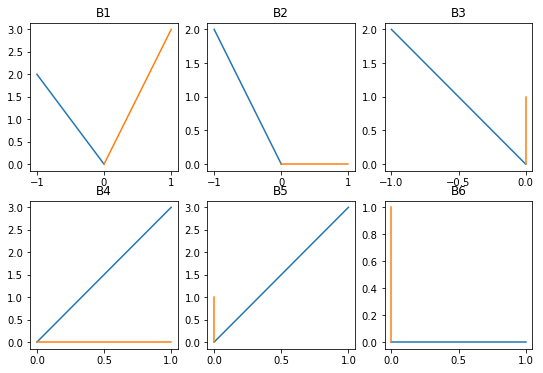

In [10]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
f, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(9,6))
ax1.plot([-1,0], [2,0])
ax1.plot([1,0], [3,0])
ax1.set_title('B1')
ax2.plot([-1,0], [2,0])
ax2.plot([1,0], [0,0])
ax2.set_title('B2')
ax3.plot([-1,0], [2,0])
ax3.plot([0,0], [1,0])
ax3.set_title('B3')

ax4.plot([1,0], [3,0])
ax4.plot([1,0], [0,0])
ax4.set_title('B4')
ax5.plot([1,0], [3,0])
ax5.plot([0,0], [1,0])
ax5.set_title('B5')
ax6.plot([1,0], [0,0])
ax6.plot([0,0], [1,0])
ax6.set_title('B6')
plt.show()


ii) 

Possible feasible bases are given as

$$
B_1 =
\begin{bmatrix}
-1 & 1 \\
2  & 3 
\end{bmatrix},
B_2 =
\begin{bmatrix}
-1 & 1 \\
2  & 0 
\end{bmatrix},
B_3=
\begin{bmatrix}
-1 & 0 \\
2  & 1 
\end{bmatrix}.
$$

In [25]:
import numpy as np
A = np.array([[-1,1,1,0],[2,3,0,1]])
b = np.array([[-1/3], [2]])
for i in range(3):
    for j in range(i+1,4):
            a = A[:,[i,j]]
            #print(i,j, np.linalg.inv(a).dot(b))

e)

* The basic matrix $B_1$ corresponds to $(3/5, 8/5)$. 
* The basic matrix $B_2$ corresponds to $(1, 4/3)$.
* The basic matrix $B_3$ correspond to $(1/3, 4/3)$.

## 3.9
By adding a slack variable $x_7$, we can change the maximization problem to the standard form. $p_1,...,p_7$ are 7 basic feasible solutions.


|   | $x_1$ | $x_2$ | $x_3$ | $x_4$ | $x_5$  | $x_6$ | $x_7$ |
| --- | --- | --- | --- | --- | --- | --- | --- |
| $p_1$ | 20 | 0 | 0 | 0 | 0 | 0 | 0 |
| $p_2$ | 0 | 10 | 0 | 0 | 0 | 0 | 0 |
| $p_3$ | 0 | 0 | 20 | 0 | 0 | 0 | 0 |
| $p_4$ | 0 | 0 | 0 | 20 | 0 | 0 | 0 |
| $p_5$ | 0 | 0 | 0 | 0 | 20 | 0 | 0 |
| $p_6$ | 0 | 0 | 0 | 0 | 0 | 15 | 0 |
| $p_7$ | 0 | 0 | 0 | 0 | 0 | 0 | 60 |

Clearly, the optimal value is 100, which attains at the point $p_5$.

**General Methodology:**

Find $j^*\in \arg\max \{\frac{c_j}{a_j}\}$. Then the $j^*$(s) indicate(s) the optimal solution, where we set the  $j^*$-th coordinate to $b/a_j$ while keep the rest coordinates 0.

If $c_j <0 \text{ or } c_j > 0, a_j\leq 0$, then just skip calculating $\frac{c_j}{a_j}$, since those variables won't become basic variables.

## 3.13
a) The objective value will increase by $3\times 7 = 21$.

b) ~~**No**. If have some $j$ such that $c_j-z_j > 0$, then we can let $x_j$ enter the basic variables and kick out one from the basic variables, while still keep increasing the objective function value.~~

**Yes.** If for some $j$, $x_j$ is not a basic variable and the current BFS is degenerated, then  $c_j-z_j > 0$ can be possible.

c) ~~**Yes**. Suppose $x_0$ is a BFS, then $c^T(x_0+ \lambda d) \geq c^Tx_0,\forall \lambda \geq 0$. Notice that $x_0+ \lambda d$ is still in the feasible set, so the problem is unbounded.~~

**No**.If $X$ is an empty, then it is not necessarily true.

d) **No**. If all the BFS of $X$ are non-degenerated, then the statement is true.

e) **No**. When the optimal solution is degenerated, we stay at the same BFS after one iteration.

f) **False**. A point can lead to multiple different bases. So $B_1$ and $B_2$ are not necessarily adjacent.

g) **True**. Consider the case that cost $c$ is $0$, then every feasible solution is optimal.

h) The tight upper bound on the feasible bases is $m+1$ while the tight upper bound on the BFS is $m+1$.

i) **False**. Consider a convex cone defined by $n+1$ hyper-planes, then it can have $n+1$ extreme directions. For example, the figure below has more than 3 extreme directions. (Source:Google Image.)

![(a)](./figs/cone.png)

j) ~~**True**. Since the degree of the degeneracy is $1$, we know that there are $r=n-m+1$ planes from $x\geq 0$ are binding and there are $q=m-(r-(n-m))=m-1$ basic variables are positive. Each possible choice of a basis $B$ that includes the columns of these $q$ positive variables represents $\bar x$(#). So there are $C_{n-(m-1)}^{m-(m-1)}=n-m+1$ bases associate with this $\bar x$.~~

~~Note, to see the statement (#), notice that $B \bar x=b$, so $b$ is the linear combination of columns in $B$ that corresponds to positive basic variables.~~

This is false. Above statement is flawed in *Each possible choice of a basis $B$ that includes the columns of these $q$ positive variables represents $\bar x$*. This is incorrect, as columns of these $q$ positive variables can identical to one the rest, which makes $B$ not full rank.

Consider

$$
\begin{cases}
& x_1 -x_3 +x_4 =1\\
& x_2 -x_3 = 0\\
& x_1,x_2,x_3,x_4 \geq 0
\end{cases}
$$

$\bar x = (1, 0, 0, 0)$ only corresponds to two bases.


## 3.42
We can reformulate the problem as following

$$
\begin{align}
& \min \quad z\\
& s.t \quad -2x_1 - x_2 + x_3 \leq z\\
& \qquad 2x_1 + x_2 + 4x_3 \leq 6\\
& \qquad x_1 + 4x_2 - x_3 \leq 4\\
& \qquad x_1,x_2,x_3\geq 0
\end{align}
$$

* Step 1: Eliminate $x_1$

$$
\begin{cases}
& x_1 \geq -\frac{1}{2}z -\frac{1}{2}x_2  + \frac{1}{2}x_3 \\
& x_1 \leq 3 -\frac{1}{2}x_2 -2x_3\\
& x_1 \leq 4 - 4x_2 + x_3\\
& x_1,x_2,x_3 \geq 0
\end{cases}
\Rightarrow
\begin{cases}
& 3 -\frac{1}{2}x_2 -2x_3 \geq x_1 \geq -\frac{1}{2}z -\frac{1}{2}x_2  + \frac{1}{2}x_3 \\
& 4 - 4x_2 + x_3\geq x_1 \geq -\frac{1}{2}z -\frac{1}{2}x_2  + \frac{1}{2}x_3 \\
& 3 -\frac{1}{2}x_2 -2x_3 \geq x_1 \geq 0 \\
& 4 - 4x_2 + x_3\geq x_1 \geq 0\\
& x_2,x_3 \geq 0
\end{cases}
\Rightarrow
\begin{cases}
& x_2 \leq 6 - 4x_3 \\
& x_2 \leq 1 + \frac{1}{4}x_3\\
& x_2 \leq \frac{8}{7} + \frac{1}{7}z + \frac{1}{7}x_3\\
& x_3 \leq \frac{1}{5}z + \frac{6}{5}\\
& x_2,x_3 \geq 0
\end{cases}
$$

* Step 2: Eliminate $x_2$

$$
\begin{cases}
& x_2 \leq 6 - 4x_3 \\
& x_2 \leq 1 + \frac{1}{4}x_3\\
& x_2 \leq \frac{8}{7} + \frac{1}{7}z + \frac{1}{7}x_3\\
& x_3 \leq \frac{1}{5}z + \frac{6}{5}\\
& x_2,x_3 \geq 0
\end{cases}
\Rightarrow
\begin{cases}
& 0 \leq x_2 \leq 6 - 4x_3 \\
& 0 \leq x_2 \leq 1 + \frac{1}{4}x_3\\
& 0 \leq x_2 \leq \frac{8}{7} + \frac{1}{7}z + \frac{1}{7}x_3\\
& x_3 \leq \frac{1}{5}z + \frac{6}{5}\\
& x_3 \geq 0
\end{cases}
\Rightarrow
\begin{cases}
& x_3 \leq \frac{3}{2} \\
& x_3 \geq -8 - z\\
& x_3 \leq \frac{1}{5}z + \frac{6}{5}\\
& x_3 \geq 0
\end{cases}
$$

* Step 3: Eliminate $x_3$

$$
\begin{cases}
& x_3 \leq \frac{3}{2} \\
& x_3 \geq -8 - z\\
& x_3 \leq \frac{1}{5}z + \frac{6}{5}\\
& x_3 \geq 0
\end{cases}
\Rightarrow
\begin{cases}
& \frac{1}{5}z + \frac{6}{5} \geq x_3 \geq -8 - z\\
& \frac{1}{5}z + \frac{6}{5} \geq x_3 \geq 0 \\
& \frac{3}{2} \geq x_3 \geq -8 - z\\
& \frac{3}{2}\geq x_3 \geq 0 \\
\end{cases}
\Rightarrow
z\geq -6
$$

So the optimal value for the original LP is **z=6**.

## Exercise 3.18

a) **False**. The cost of every consecutive BFS visited by the simplex is strictly less than the cost of the previous one. otherwise the algorithms is supposed to terminate. To see this,  in every iteration, the algorithm is moving along a direction $d_j$ with positive distance given by the minimal ratio test, where $j$ satisfies $(c_j-z_j)< 0, j \in N$.

b) **True**. Assume $x_r$ is leaving the basic variables and $x_k$ enters. Then previous $c_r-z_r$ changes from zero to $-\frac{c_r-z_r}{y_{k,r}}$, which is positive. So $x_r$ can no longer enter the basic variables.

c) **False**. Look at the example p.114 of Chapter 3 of the BT's book. The problem is,

$$
\begin{align}
& \min x_5 + x_6 + x_7 + x_8 \\
& s.t \quad  x_1 + 2x_2+ 3x_3 +x_5 = 3\\
& \qquad -x_1 + 2x_2 + 6x_3 + x_6= 2 \\
& \qquad 4x_2 + 9x_3+ x_7 = 5\\
& \qquad 3x_3 + x_4 + x_8 = 1\\
& \qquad x_1,...,x_8 \geq 0
\end{align}
$$

Let's begin with $(0, 0, 0, 0, 3, 2, 5, 1)$. 

* In the first iteration, $x_4$ enteres and the BFS is $(0, 0, 0, 1, 3, 2, 5, 0 )$.
* In the very next iteration, $x_4$ leaves and the BFS is $(0, 0, 1/3, 0, 2, 0, 2, 0)$.

d) **False**. When the optimal solution is not unique, the statement is false. Consider the following problem

$$
\begin{align}
& \min x_1\\
& s.t \quad  x_2 - x_3 = 1\\
& \qquad x_2 + x_4 = 2\\
& \qquad x_1,x_2,x_3,x_4\geq 0
\end{align}
$$

Consider 
$B_1 =
\begin{bmatrix}
1 & -1 \\
1  & 0 
\end{bmatrix}$, the BFS is $(0, 2, 1, 0)$ and non-degenerated. Also, consider 
$B_2 =
\begin{bmatrix}
1 & 0 \\
1  & 1 
\end{bmatrix}$, the BFS is $(0, 1, 0, 1)$ and non-degenerated. 

e) ~~**False**. Consider the cost $c=0$, then any feasible solution is optimal.~~

In general this is true. But for simplex method, it can only explore the BFS, hence at most $m$ positive components.

## Exercise 3.19
Since the problem only asks for some parameters values, so the answer below by no means will be comprehensive. They are just some feasible choices.

a) In order to guarantee the optimality, $\beta=0$. To make the case simple, we can also assume $\delta>0$ and $\delta+\frac{2}{3}\gamma=0$ to guarantee the optimality of the BFS by a iteration of the simplex method. In sum, a possible solution would be

$$
(\alpha, \beta, \gamma, \delta, \eta) = (1, 0, -3, 2, 1).
$$

b) For the LP to be unbounded, we need to set $\delta,\alpha,\gamma$ to be negative. A possible combination would be

$$
(\alpha, \beta, \gamma, \delta, \eta) = (-1, 1, -1, -1, 1).
$$

c) As long we can move current BFS by a positive distance, we are done. This requires $\beta, \delta>0$.A possible combination would be

$$
(\alpha, \beta, \gamma, \delta, \eta) = (1, 3, -3, 3, 2).
$$



## Exercise 3.20

a) $\beta \geq 0$, $\alpha,\gamma,\delta,\eta,\zeta\in R$.

b) $\beta < 0$, $\alpha\geq 0$, $\gamma,\delta,\eta,\zeta\in R$. In this case, no direction will increase $x_2$ to a non-negative number.

c) We need $\beta \geq 0$ to guarantee the feasibility. Then as long as at least one of the $\gamma,\delta,\zeta\in R$ is negative, then the current basis is not optimal. Also, set $\eta \in R$.

d) We need $\beta \geq 0$ to guarantee the feasibility. To make the optimal is unbounded, we need to make the one $y_j\leq 0$ with only one iteration. 

After trying different pivots, I discover the following ranges work. $\alpha <0,\gamma<0$, $\beta,  \delta,\zeta \geq 0$, $\eta > \frac{4}{3}$, and $2\frac{\gamma}{\eta} + \delta <0$. 

The last constraints guarantee the negative reduced cost for $x_4$ after one iteration of the simplex method.

e) To make the statement hold, $\gamma <0$, $\eta > 0$ and $\frac{2}{\eta}<\frac{3}{2}$. In sum, $\beta\geq 0, \gamma < 0, \eta > \frac{4}{3}$, $\alpha, \delta,\zeta \in R$.

f) This happens when there is a degeneracy, that is to say, $\beta=0$. In sum, $\beta=0, \zeta < 0$, $\alpha, \gamma, \eta, \delta \in R$.

## Exercise 3.27

(a) Notice that, if $x\geq 0$ and $x\neq 0$, there exist a $\alpha>0$, such that $\alpha x=y + z$. To see this, define $\alpha=\frac{1}{\min_i \{x_i|x_i>0\}}$ and $y^T=(I(x_1>0), ..., I(x_n>0))$, where $I(.)$ is a indicator function.
Then $\alpha x=y + z$, where $z\geq 0$. Since $Ax=0$, so we have $A(y+z)=0$. To conclude, the problem can be formulated as

$$
\begin{align}
& \max\qquad 1_n^T y\\
& s.t.\quad A(y+z)=0\\
& \qquad y_i \leq 1, i=1,2,...,n\\
& \qquad y, z \geq 0
\end{align}
$$

(b)

$$
\begin{align}
& \max\qquad 1_n^T y\\
& s.t.\quad A(y+z)=\alpha b\\
& \qquad y_i \leq 1, i=1,2,...,n\\
& \qquad y, z \geq 0 \\
& \qquad\alpha \geq 1
\end{align}
$$

**Remark**: The reason I set $\alpha\geq 1$ instead of using $\alpha\geq 0$, is only to scale the coordinates of $x$, which are smaller than 1 but greater than 0.

## Exercise 3.31

a) As shown below, $(b_1,b_2)$ is supposed to be enclosed by the four boundaries such that $P(b_1,b_2)$ is non-empty.

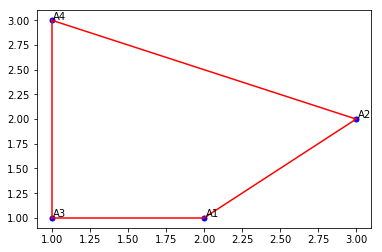

In [104]:
import matplotlib.pyplot as plt
import numpy as np
fig, ax = plt.subplots()
x, y = np.array([2,3,1,1]), np.array([1,2,1,3])
for i in range(4):
    ax.plot(x[i],y[i], 'bo', markersize=5)
    ax.annotate("A{}".format(i+1), (x[i]+0.01,y[i]+0.01))
ax.plot(x[[3, 2]],y[[3, 2]], 'r-', markersize=3)
ax.plot(x[[2, 0]],y[[2, 0]], 'r-', markersize=3)
ax.plot(x[[0, 1]],y[[0, 1]], 'r-', markersize=3)
ax.plot(x[[1, 3]],y[[1, 3]], 'r-', markersize=3)
plt.show()

b) To have degeneracy, we must set at least one basic variable to zero. So the  $(b_1,b_2)$ has to lie on the boundary of the set, namely on the four segments, whose endpoints are ($A_i,A_j$) respectively.

c) 
Denote $\hat A_1=(2,1,1)^T,\hat A_2=(3,2,1)^T,\hat A_3=(1,1,1)^T,\hat A_4=(1,3,1)^T$ and $B_1=(\hat A_1, \hat A_2,\hat A_3)$, $B_2=(\hat A_1, \hat A_2,\hat A_4)$, $B_3=(\hat A_1, \hat A_3,\hat A_4)$, $B_4=(\hat A_2, \hat A_3,\hat A_4)$.

* If $(b_1,b_2)$ lies on ($A_3,A_1$), then the bases are $B_1, B_3$.

* If $(b_1,b_2)$ lies on ($A_1,A_2$), then the bases are $B_1, B_2$.

* If $(b_1,b_2)$ lies on ($A_2,A_4$), then the bases are $B_2, B_4$.

* If $(b_1,b_2)$ lies on ($A_4,A_3$), then the bases are $B_3, B_4$.

d) 

* See below for $S_1 = \{(b_1,b_2) | B_1 \text{ is optimal }\}$ 

* See below for $S_2 = \{(b_1,b_2) | B_2 \text{ is optimal }\}$

* See below for $S_3 = \{(b_1,b_2) | B_3 \text{ is optimal }\}$

* See below for $S_4 = \{(b_1,b_2) | B_4 \text{ is optimal }\} = \emptyset$

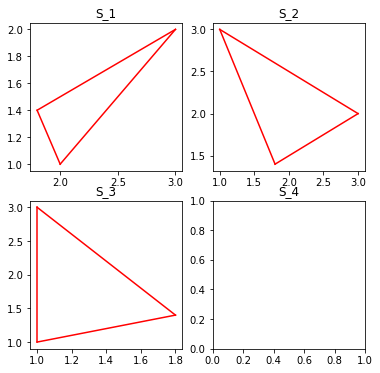

In [16]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
f, ((ax0, ax1), (ax2, ax3)) = plt.subplots(2, 2, figsize=(6,6))
ax0.plot([2,3],[1,2], 'r-', markersize=3)
ax0.plot([2,9/5],[1, 7/5], 'r-', markersize=3)
ax0.plot([9/5, 3],[7/5, 2], 'r-', markersize=3)
ax0.set_title('S_1')

ax1.plot([1,3],[3,2], 'r-', markersize=3)
ax1.plot([3,9/5],[2, 7/5], 'r-', markersize=3)
ax1.plot([9/5, 1],[7/5, 3], 'r-', markersize=3)
ax1.set_title('S_2')

ax2.plot(x[[3, 2]],y[[3, 2]], 'r-', markersize=3)
ax2.plot([1,9/5],[1, 7/5], 'r-', markersize=3)
ax2.plot([9/5, 1],[7/5, 3], 'r-', markersize=3)
ax2.set_title('S_3')

ax3.set_title('S_4')
plt.show()

e) According to the second graph below, if $(b_1, b_2)=(2,1)$, then BFS is set to $(1,0,0,0)$, we got the optimal.

f) Based on the first figure below, we know that $(b_1, b_2)$ can be present by any three columns of $A$. 

At first iteration, we pivot on $x_2$, then we end up with the basic variables $x_1,x_3,x_4$. From the second figure below, we know it's the optimal solution.

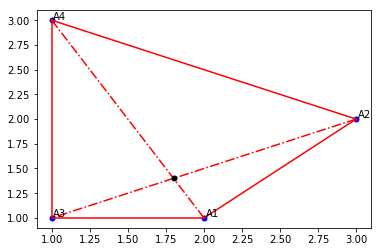

In [120]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits import mplot3d
fig, ax = plt.subplots()
x, y = np.array([2,3,1,1]), np.array([1,2,1,3])
for i in range(4):
    ax.plot(x[i],y[i], 'bo', markersize=5)
    ax.annotate("A{}".format(i+1), (x[i]+0.01,y[i]+0.01))
ax.plot(x[[3, 2]],y[[3, 2]], 'r-', markersize=3)
ax.plot(x[[2, 0]],y[[2, 0]], 'r-', markersize=3)
ax.plot(x[[0, 1]],y[[0, 1]], 'r-', markersize=3)
ax.plot(x[[1, 3]],y[[1, 3]], 'r-', markersize=3)
ax.plot(x[[1, 3]],y[[1, 2]], 'r-.', markersize=3)
ax.plot(x[[0, 3]],y[[0, 3]], 'r-.', markersize=3)
ax.plot(9/5, 7/5, 'ko', markersize=5)
plt.show()

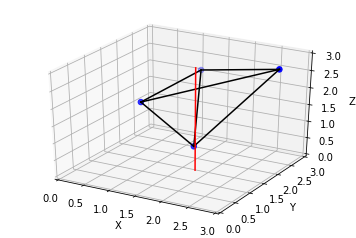

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits import mplot3d
fig = plt.figure()
ax = plt.axes(projection='3d')
x, y, z = np.array([2,3,1,1]), np.array([1,2,1,3]), np.array([1,3,2,2])
z0 = np.array([0, 0, 0, 0])
ax.scatter3D(x, y, z, c="blue", s=30)
for i in range(4):
    #ax.plot([x[i],x[i]],[y[i], y[i]],[z[i],z0[i]], "r-")
    for j in range(i+1, 4):
        ax.plot(x[[i,j]], y[[i,j]], z[[i,j]],"k-")
ax.plot([9/5, 9/5], [7/5, 7/5], [0, 3],"r-")
ax.set_xlim(0,3), ax.set_ylim(0,3), ax.set_zlim(0,3)
ax.set_xlabel('X'), ax.set_ylabel('Y'), ax.set_zlabel('Z')
plt.show()

In [5]:
# c = [1, 3, 2, 2]
# A = [[2,3,1,1], [1, 2,1,3], [1,1,1,1]]
# b = [9/5, 7/5, 1]
# x1_bounds = (0, None)
# x2_bounds = (0, None)
# x3_bounds = (0, None)
# x4_bounds = (0, None)
# from scipy.optimize import linprog
# res = linprog(c, A_eq=A, b_eq=b, bounds=(x1_bounds, x2_bounds,x3_bounds,x4_bounds), options={"disp": True})

Optimization terminated successfully.
         Current function value: 1.200000    
         Iterations: 5


In [2]:
import numpy as np
A = np.array([[2,3,1,1], [1, 2,1,3], [1,1,1,1]])
B = A [:,[0,2,3]]

In [4]:
np.linalg.inv(B)

array([[ 1. ,  0. , -1. ],
       [-1. , -0.5,  2.5],
       [-0. ,  0.5, -0.5]])